# GOES netCDF EDA
Sai Kamal, Chinni Setty

In [ ]:
%pip install tornado-helper boto3 netCDF4


In [2]:
import logging
import sys
logging.basicConfig(level=logging.DEBUG, stream=sys.stdout)

In [4]:
from tornado_helper import TorNet

downloader = TorNet()


In [ ]:
!apt-get install libnetcdf-dev libhdf5-dev


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
libnetcdf-dev is already the newest version (1:4.8.1-1).
libnetcdf-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [8]:
import netCDF4 as nc

file_path = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc"
dataset = nc.Dataset(file_path)

print(dataset)
print(dataset.variables.keys())  # List of available variables


<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Mesoscale
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    title: ABI L

In [9]:
import netCDF4 as nc

# Define the file path
file_path = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc"

# Open the NetCDF dataset
try:
    dataset = nc.Dataset(file_path, mode="r")  # Open in read mode
    print("Dataset Metadata:")
    print(dataset)

    # List all available variables
    print("\nAvailable Variables:")
    for var in dataset.variables.keys():
        print(f" - {var}")

    # Print details of a specific variable (e.g., first variable)
    sample_var = list(dataset.variables.keys())[0]
    print(f"\nVariable Details ({sample_var}):")
    print(dataset.variables[sample_var])

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

finally:
    dataset.close()  # Close the dataset


Dataset Metadata:
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Mesoscale
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.

In [ ]:
import netCDF4 as nc

file_path = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590001584_e20170590002047_c20170590002336.nc"


# Open the NetCDF file
dataset = nc.Dataset(file_path, mode="r")

# Print metadata
print("Dataset Metadata:\n", dataset)

# Print available variables
print("\nAvailable Variables:")
for var in dataset.variables.keys():
    print(f" - {var}")

# Print details of the first variable
sample_var = list(dataset.variables.keys())[0]
print(f"\nVariable Details ({sample_var}):")
print(dataset.variables[sample_var])

dataset.close()


Dataset Metadata:
 <class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Mesoscale
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPM1-M3_G16_s20170590001584_e20170590002047_c20170590002336.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0

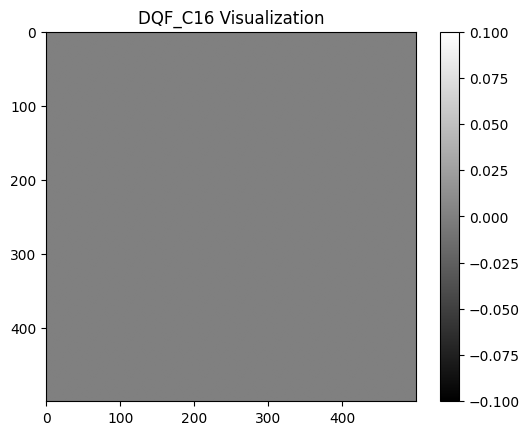

In [15]:
import matplotlib.pyplot as plt

dataset = nc.Dataset(file_path, mode="r")
variable_name = "DQF_C16"  # Modify this based on available variables

if variable_name in dataset.variables:
    data = dataset.variables[variable_name][:]
    plt.imshow(data, cmap="gray")  # Change colormap if needed
    plt.colorbar()
    plt.title(f"{variable_name} Visualization")
    plt.show()
else:
    print(f"Variable '{variable_name}' not found in dataset.")

dataset.close()


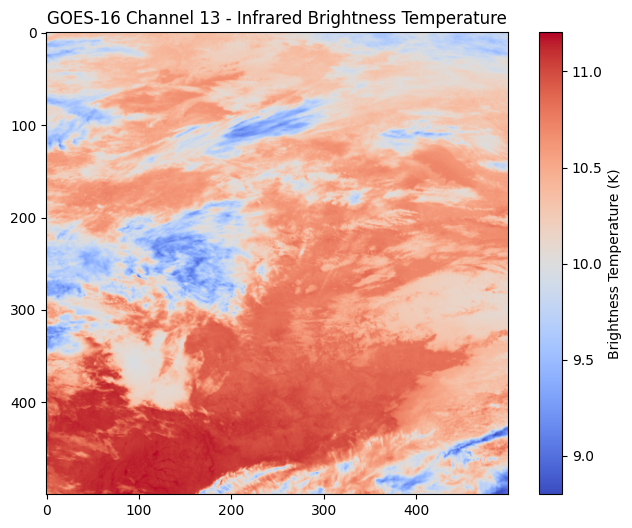

In [17]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
file_path = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc"

try:
    # Open the dataset in read mode
    dataset = nc.Dataset(file_path, mode="r")

    # Extract and scale CMI_C13 (Infrared Brightness Temperature)
    c13_var = dataset.variables.get('CMI_C13', None)  # Check if variable exists
    if c13_var is None:
        raise KeyError("CMI_C13 not found in the dataset.")

    c13_data = c13_var[:]
    scale_factor = c13_var.scale_factor if 'scale_factor' in c13_var.ncattrs() else 1.0
    c13_data = c13_data * scale_factor  # Apply scaling

    # Plot the image
    plt.figure(figsize=(8, 6))
    plt.imshow(c13_data, cmap="coolwarm", origin="upper")
    plt.colorbar(label="Brightness Temperature (K)")
    plt.title("GOES-16 Channel 13 - Infrared Brightness Temperature")
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    if 'dataset' in locals() and dataset.isopen():
        dataset.close()  # Close dataset safely



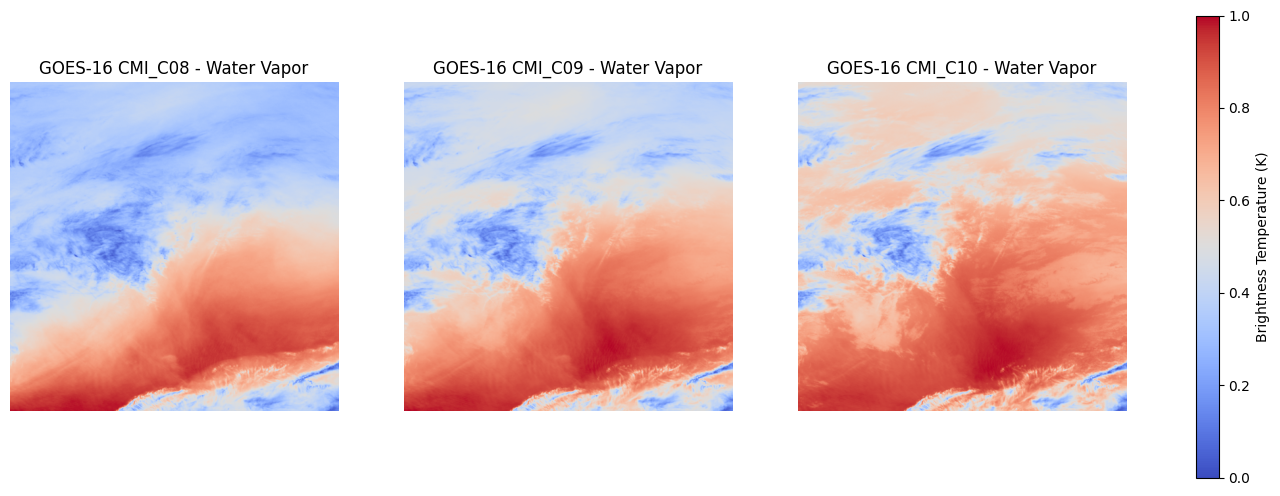

In [18]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Define file path
file_path = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc"

try:
    # Open the dataset
    dataset = nc.Dataset(file_path, mode="r")

    # Extract Water Vapor Bands (CMI_C08, CMI_C09, CMI_C10)
    bands = ['CMI_C08', 'CMI_C09', 'CMI_C10']
    water_vapor_data = {}

    for band in bands:
        if band in dataset.variables:
            var = dataset.variables[band][:]
            scale_factor = dataset.variables[band].scale_factor if 'scale_factor' in dataset.variables[band].ncattrs() else 1.0
            water_vapor_data[band] = var * scale_factor
        else:
            print(f"Warning: {band} not found in dataset.")

    # Plot Water Vapor Bands
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    colormap = "coolwarm"

    for i, band in enumerate(bands):
        if band in water_vapor_data:
            axes[i].imshow(water_vapor_data[band], cmap=colormap, origin="upper")
            axes[i].set_title(f"GOES-16 {band} - Water Vapor")
            axes[i].axis("off")

    plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), ax=axes, orientation="vertical", label="Brightness Temperature (K)")
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    if 'dataset' in locals() and dataset.isopen():
        dataset.close()


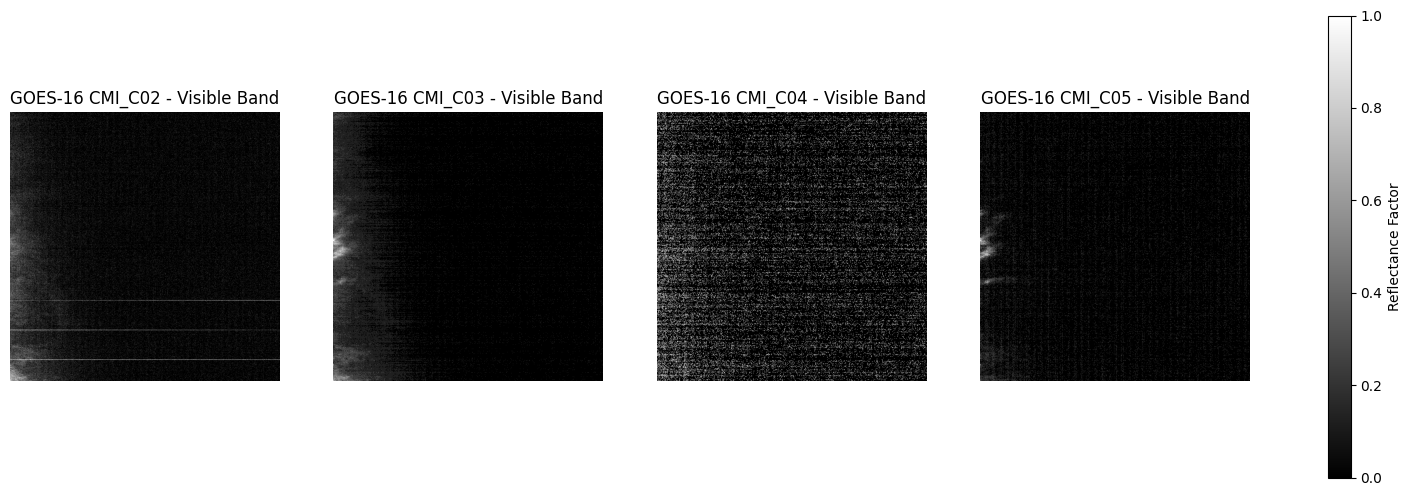

In [21]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Define file path
file_path = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc"

try:
    # Open the dataset
    dataset = nc.Dataset(file_path, mode="r")

    # Extract Visible Bands (CMI_C02, CMI_C03, CMI_C04, CMI_C05)
    bands = ['CMI_C02', 'CMI_C03', 'CMI_C04', 'CMI_C05']
    visible_data = {}

    for band in bands:
        if band in dataset.variables:
            var = dataset.variables[band][:]
            scale_factor = dataset.variables[band].scale_factor if 'scale_factor' in dataset.variables[band].ncattrs() else 1.0
            visible_data[band] = var * scale_factor
        else:
            print(f"Warning: {band} not found in dataset.")

    # Plot Visible Bands
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    colormap = "grey"

    for i, band in enumerate(bands):
        if band in visible_data:
            axes[i].imshow(visible_data[band], cmap=colormap, origin="upper")
            axes[i].set_title(f"GOES-16 {band} - Visible Band")
            axes[i].axis("off")

    plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), ax=axes, orientation="vertical", label="Reflectance Factor")
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    if 'dataset' in locals() and dataset.isopen():
        dataset.close()


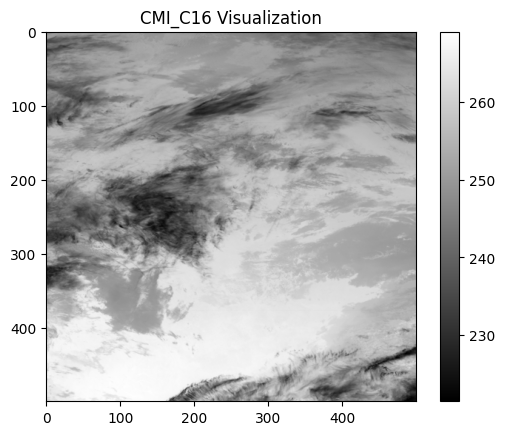

In [ ]:
import matplotlib.pyplot as plt

dataset = nc.Dataset(file_path, mode="r")
variable_name = "CMI_C16"  # Modify this based on available variables

if variable_name in dataset.variables:
    data = dataset.variables[variable_name][:]
    plt.imshow(data, cmap="gray")  # Change colormap if needed
    plt.colorbar()
    plt.title(f"{variable_name} Visualization")
    plt.show()
else:
    print(f"Variable '{variable_name}' not found in dataset.")

dataset.close()

In [11]:
import numpy as np

dataset = nc.Dataset(file_path, mode="r")
variable_name = "DQF_C15"  # Replace with actual variable

if variable_name in dataset.variables:
    data = dataset.variables[variable_name][:]
    print(f"\nExtracted Data Shape: {np.shape(data)}")
else:
    print(f"Variable '{variable_name}' not found in dataset.")

dataset.close()



Extracted Data Shape: (500, 500)


In [ ]:
import netCDF4 as nc
import numpy as np
from scipy.ndimage import generic_filter

# File paths
input_file = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc"
output_file = "/content/cleaned_GOES18.nc"

# Open input dataset
dataset = nc.Dataset(input_file, mode="r")

# Create output NetCDF file
cleaned_dataset = nc.Dataset(output_file, "w", format="NETCDF4")

# Copy global attributes
cleaned_dataset.setncatts(dataset.__dict__)

# Copy dimensions
for name, dim in dataset.dimensions.items():
    cleaned_dataset.createDimension(name, len(dim) if not dim.isunlimited() else None)

# Identify all CMI bands
cmi_bands = [var for var in dataset.variables.keys() if var.startswith("CMI_C")]

# Function to clean and interpolate missing values
def clean_data(var_data, fill_value):
    var_data = np.where(var_data == fill_value, np.nan, var_data)
    cleaned_data = generic_filter(var_data, np.nanmean, size=3, mode='nearest')  # Nearest neighbor interpolation
    return cleaned_data

# Copy and clean variables
for var_name, var in dataset.variables.items():
    # Create new variable in cleaned dataset
    cleaned_var = cleaned_dataset.createVariable(var_name, var.datatype, var.dimensions)

    # Copy variable attributes
    cleaned_var.setncatts({k: var.getncattr(k) for k in var.ncattrs()})

    # Process CMI bands
    if var_name in cmi_bands:
        fill_value = var.getncattr("_FillValue") if "_FillValue" in var.ncattrs() else np.nan
        cleaned_var[:] = clean_data(var[:], fill_value)  # Apply missing value handling
    else:
        cleaned_var[:] = var[:]  # Copy other variables without modification

# Close datasets
dataset.close()
cleaned_dataset.close()

print(f"Cleaned dataset saved as: {output_file}")


Cleaned dataset saved as: /content/cleaned_GOES18.nc


In [ ]:
import netCDF4 as nc
import numpy as np
import pandas as pd

# File path
file_path = "/content/sample_data/OR_ABI-L2-MCMIPM1-M3_G16_s20170590001584_e20170590002047_c20170590002336.nc"

# Open NetCDF dataset
dataset = nc.Dataset(file_path, mode="r")

# Identify CMI bands
cmi_bands = [var for var in dataset.variables.keys() if var.startswith("CMI_C")]

# Initialize summary report
summary_data = []

# Function to apply normalization
def normalize_data(var_data, method="min-max"):
    """Normalize data using Min-Max Scaling or Standardization"""
    valid_data = var_data[~np.isnan(var_data)]  # Remove NaNs
    if method == "min-max":
        return (var_data - np.min(valid_data)) / (np.max(valid_data) - np.min(valid_data))
    elif method == "z-score":
        return (var_data - np.mean(valid_data)) / np.std(valid_data)
    else:
        return var_data  # No normalization

# Process each CMI band
for band in cmi_bands:
    var_data = dataset.variables[band][:]

    # Check for _FillValue and replace with NaN
    fill_value = dataset.variables[band].getncattr("_FillValue") if "_FillValue" in dataset.variables[band].ncattrs() else np.nan
    var_data = np.where(var_data == fill_value, np.nan, var_data)

    # Compute basic stats
    valid_values = var_data[~np.isnan(var_data)]
    min_val = np.min(valid_values) if valid_values.size > 0 else None
    max_val = np.max(valid_values) if valid_values.size > 0 else None
    mean_val = np.mean(valid_values) if valid_values.size > 0 else None
    std_val = np.std(valid_values) if valid_values.size > 0 else None
    missing_count = np.sum(np.isnan(var_data))

    # Normalize data using Min-Max Scaling
    normalized_data = normalize_data(var_data, method="min-max")

    # Append to summary
    summary_data.append([band, min_val, max_val, mean_val, std_val, missing_count])

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary_data, columns=["Band", "Min", "Max", "Mean", "Std Dev", "Missing Values"])

# Display summary
print("\n### Dataset Summary Report ###")
print(summary_df)

dataset.close()



### Dataset Summary Report ###
       Band         Min         Max        Mean    Std Dev  Missing Values
0   CMI_C01    0.000000    0.010012    0.000529   0.001182               0
1   CMI_C02    0.000000    0.007326    0.000467   0.000675               0
2   CMI_C03    0.000000    0.008547    0.000311   0.000689               0
3   CMI_C04    0.000000    0.001221    0.000123   0.000276               0
4   CMI_C05    0.000000    0.007326    0.000220   0.000495               0
5   CMI_C06    0.000000    0.011233    0.000025   0.000211               0
6   CMI_C07  224.050354  292.549835  265.459717   9.194133               0
7   CMI_C08  219.228622  246.671356  233.310059   6.274043               0
8   CMI_C09  220.408112  256.343170  241.670868   7.595055               0
9   CMI_C10  221.076492  262.633759  248.098953   7.678288               0
10  CMI_C11  222.413239  282.802979  263.036835  10.257878               0
11  CMI_C12  222.688461  257.640594  240.474960   6.610915          

In [ ]:
import netCDF4 as nc

file_path = "/content/cleaned_GOES18.nc"
dataset = nc.Dataset(file_path)

print(dataset)
print(dataset.variables.keys())  # List of available variables

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Mesoscale
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    title: ABI L

In [ ]:
import netCDF4 as nc

# Define the file path
file_path = "/content/cleaned_GOES18.nc"

# Open the NetCDF dataset
try:
    dataset = nc.Dataset(file_path, mode="r")  # Open in read mode
    print("Dataset Metadata:")
    print(dataset)

    # List all available variables
    print("\nAvailable Variables:")
    for var in dataset.variables.keys():
        print(f" - {var}")

    # Print details of a specific variable (e.g., first variable)
    sample_var = list(dataset.variables.keys())[0]
    print(f"\nVariable Details ({sample_var}):")
    print(dataset.variables[sample_var])

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

finally:
    dataset.close()  # Close the dataset


Dataset Metadata:
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Mesoscale
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPM1-M3_G16_s20170590000584_e20170590001041_c20170590001121.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.